In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
import warnings
warnings.filterwarnings('ignore')

import math

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
file1 =pd.read_csv("/content/sample_data/BCHUSDC-1d-2021-11.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                ) 

In [ ]:
file2 =pd.read_csv("/content/sample_data/BCHUSDC-1d-2021-12.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                ) 

In [ ]:
file1['Open time'] = pd.to_datetime(file1['Open time'],unit='ms')
file2['Open time'] = pd.to_datetime(file2['Open time'],unit='ms')

In [ ]:
Data=pd.concat([file1, file2])
Data=Data[{'Open time','Close'}]
Data.set_index('Open time',inplace=True)
df=Data

In [ ]:
print(df)

                     Close
Open time                 
2021-10-01 01:00:00  542.9
2021-10-01 23:13:20  551.3
2021-10-03 00:13:20  571.6
2021-10-04 01:13:20  553.2
2021-10-04 23:26:40  595.9
...                    ...
2021-12-26 23:06:40  466.6
2021-12-28 00:06:40  442.6
2021-12-29 01:06:40  428.0
2021-12-29 23:20:00  430.0
2021-12-31 00:20:00  430.8

[92 rows x 1 columns]


In [ ]:
X = df.values
train=df.loc[: datetime(2021, 12, 20)]
test = df.loc[datetime(2021, 12, 21): ]
train.iloc[-1]

Close    430.5
Name: 2021-12-20 00:00:00, dtype: float64

In [ ]:
stepwise_fit = auto_arima(train, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=463.305, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=465.293, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=465.287, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=462.021, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=467.116, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.520 seconds


In [ ]:
model=ARIMA(train,order=(1, 0, 2))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   50
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -234.779
Date:                Tue, 11 Jan 2022   AIC                            479.558
Time:                        11:39:41   BIC                            489.118
Sample:                    11-01-2021   HQIC                           483.199
                         - 12-20-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.5783     75.613      7.030      0.000     383.379     679.777
ar.L1          0.9572      0.053     18.056      0.000       0.853       1.061
ma.L1          0.0375      0.160      0.235      0.814      -0.275       0.350
ma.L2         -0.1097      0.147     -0.749      0.454      -0.397       0.177
sigma2       669.0557    117.545      5.692      0.000     438.672     899.440
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.24
Prob(Q):                              0.89   Prob(JB):                         0.07
Heteroskedasticity (H):               0.48   Skew:                             0.21
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


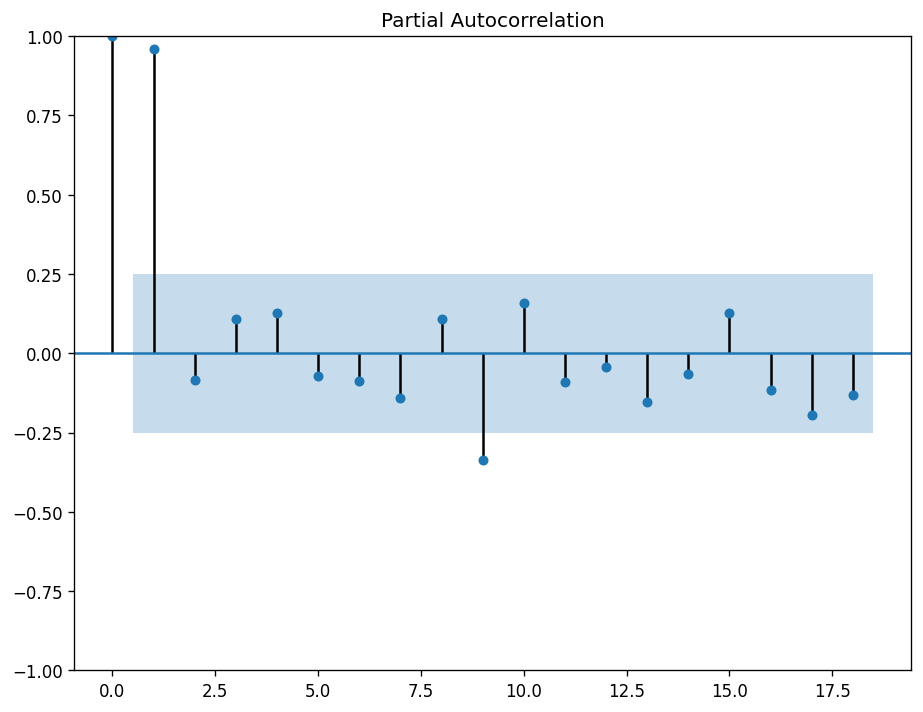

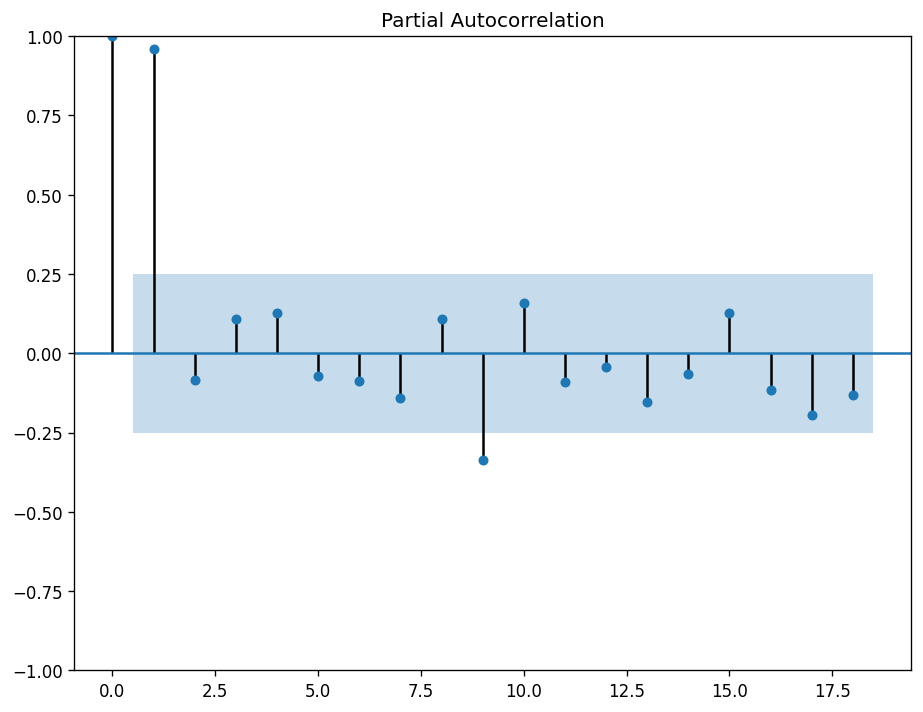

In [ ]:
plot_pacf(df)

In [ ]:
qs = range(0, 8)
ps = range(0, 8)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)
# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = ARIMA(train, order=(param[0], d, param[1])).fit()
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())


   parameters         aic
0      (0, 0)  462.021370
11     (1, 3)  463.776154
19     (2, 3)  463.841562
1      (0, 1)  463.953466
8      (1, 0)  463.975334


In [ ]:

model = ARIMA(train, order=(8, 1, 4))
model_fit = model.fit()
output = model_fit.predict(start = datetime(2021, 12, 21), end = datetime(2021, 12, 31))
print(test)
print(output)


            Close
Open time        
2021-12-21  437.7
2021-12-22  438.3
2021-12-23  455.4
2021-12-24  451.8
2021-12-25  456.1
2021-12-26  451.7
2021-12-27  466.6
2021-12-28  442.6
2021-12-29  428.0
2021-12-30  430.0
2021-12-31  430.8
2021-12-21    422.369353
2021-12-22    434.993881
2021-12-23    434.629687
2021-12-24    445.148245
2021-12-25    443.252102
2021-12-26    448.262627
2021-12-27    444.756473
2021-12-28    447.508425
2021-12-29    442.319763
2021-12-30    442.325053
2021-12-31    436.150524
Freq: D, Name: predicted_mean, dtype: float64


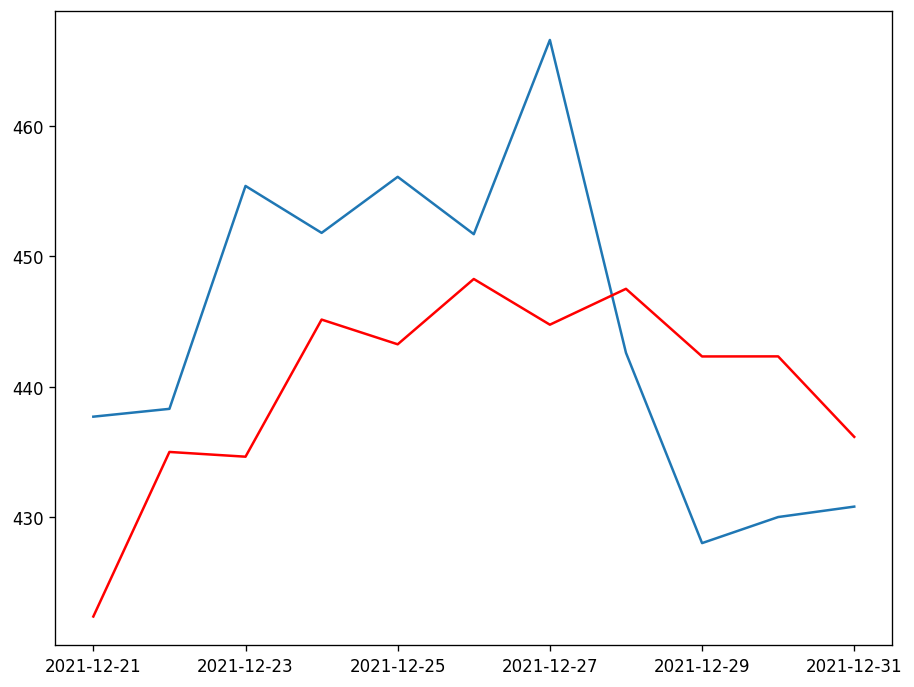

In [ ]:
plt.plot(test)
plt.plot(output, color='red')
plt.show()

[array([570.3]), array([562.]), array([532.4]), array([474.9]), array([452.1]), array([476.3]), array([474.3]), array([479.7]), array([451.2]), array([438.8]), array([459.4]), array([458.7]), array([422.]), array([436.4]), array([447.5]), array([438.3]), array([425.5]), array([436.6]), array([435.7]), array([430.5]), array([437.7]), array([438.3]), array([455.4]), array([451.8]), array([456.1]), array([451.7]), array([466.6])]
predicted=466.600000, expected=442.600000
predicted=442.600000, expected=428.000000
predicted=428.000000, expected=430.000000
predicted=430.000000, expected=430.800000
Test RMSE: 14.087


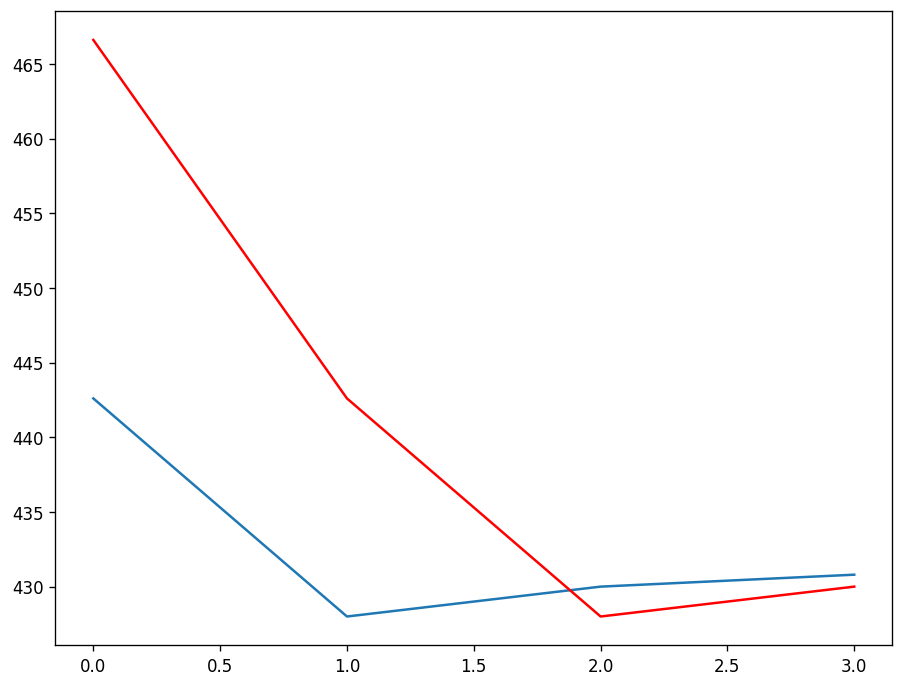

In [ ]:
history = [x for x in train]
print(history)
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0, 1, 0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

print(test)
print(yhat)